*아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.*

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/nlp-with-pytorch/blob/master/chapter_3/Chapter-3-In-Text-Examples.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/nlp-with-pytorch/blob/master/chapter_3/Chapter-3-In-Text-Examples.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

In [3]:
import numpy as np
import torch
import torch.nn as nn

seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

### 코드 3-1

In [4]:
class Perceptron(nn.Module):
    """
    퍼셉트론은 하나의 선형 층입니다
    """
    
    def __init__(self, input_dim):
        """
        매개변수:
            input_dim (int): 입력 특성의 크기
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """퍼셉트론의 정방향 계산
        
        매개변수:
            x_in (torch.Tensor): 입력 데이터 텐서
                x_in.shape는 (batch, num_features)입니다.
        반환값:
            결과 텐서. tensor.shape는 (batch,)입니다.
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

### 코드 3-2

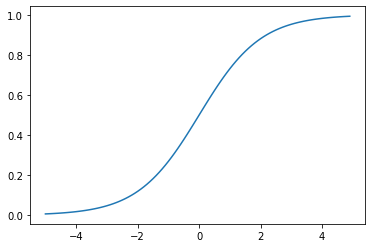

torch.Size([100])


In [6]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()
# x의 형상
print(x.shape)

### 코드 3-3

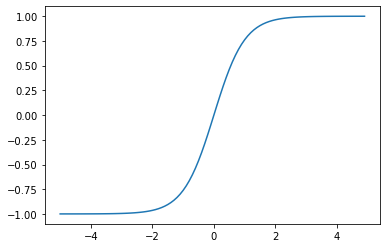

In [7]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### 코드 3-4

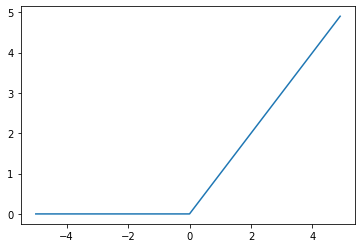

In [5]:
import torch
import matplotlib.pyplot as plt

relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

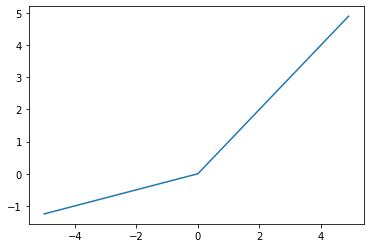

In [13]:
import torch.nn as nn
import matplotlib.pyplot as plt

prelu = nn.PReLU(num_parameters=1)
x = torch.arange(-5., 5., 0.1)
y = prelu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### 코드 3-6

In [15]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(2, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[-0.9122, -1.2502,  0.8032],
        [-0.2071,  0.0544,  0.1378]])
tensor([[0.1375, 0.0981, 0.7644],
        [0.2695, 0.3500, 0.3805]])
tensor([1.0000, 1.0000])


### 코드 3-7

In [19]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(2, 2, requires_grad=True)
targets = torch.randn(2, 2)
loss = mse_loss(outputs, targets)
loss.backward()

print(f'output: {outputs}')
print(f'target: {targets}')
print(loss)

output: tensor([[-0.3842,  2.3363],
        [-1.2584,  1.2859]], requires_grad=True)
target: tensor([[-0.0518, -0.9681],
        [-0.5863,  0.0532]])
tensor(3.2502, grad_fn=<MseLossBackward0>)


In [20]:
x = [[-0.3842,  2.3363],
        [-1.2584,  1.2859]]
y = [[-0.0518, -0.9681],
        [-0.5863,  0.0532]]
result = 0
for i in range(2):
    for j in range(2):
        x_ij = x[i][j]
        y_ij = y[i][j]
        result += (x_ij - y_ij)**2

print(result/4)

3.2502042050000006


### 코드 3-8

In [36]:
import torch
import torch.nn as nn

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(outputs.grad)
loss.backward()
print(outputs.grad)

print(f'output: {outputs}')
print(f'target: {targets}')
print (loss)

None
tensor([[ 0.1760, -0.2636,  0.0473,  0.0158,  0.0245],
        [-0.2019,  0.0199,  0.0976,  0.0564,  0.0281],
        [ 0.0064,  0.0716,  0.1115, -0.3283,  0.1387]])
output: tensor([[ 1.4400,  0.5138,  0.1259, -0.9715, -0.5332],
        [ 1.7124, -0.1732,  1.4146,  0.8660,  0.1698],
        [-1.7733,  0.6352,  1.0782, -2.0143,  1.2965]], requires_grad=True)
target: tensor([1, 0, 3])
tensor(2.2277, grad_fn=<NllLossBackward0>)


### 코드 3-9

In [38]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
print(probabilities)

targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
loss.backward()
print(loss)

tensor([[0.1906],
        [0.4885],
        [0.4079],
        [0.4148]], grad_fn=<SigmoidBackward0>)
tensor(0.9402, grad_fn=<BinaryCrossEntropyBackward0>)
